In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# Extract features and target
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into features (X) and target (y)
X = df.drop(columns=[y.columns[0]]).values  # Correct way to get target column name
y = y.iloc[:, 0].values  # Convert y to a NumPy array

# Verify dataset information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify if the problem is binary classification
is_binary = len(np.unique(y)) == 2
print(f"\nIs Binary Classification: {is_binary}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int


Results for Logistic Regression:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9231		0.9785	0.9321
2	0.9322		0.9810	0.9400
3	0.9331		0.9820	0.9399
4	0.9259		0.9782	0.9339
5	0.9394		0.9823	0.9458
6	0.9304		0.9777	0.9384
7	0.9295		0.9817	0.9374
8	0.9259		0.9751	0.9338
9	0.9439		0.9855	0.9498
10	0.9277		0.9823	0.9351


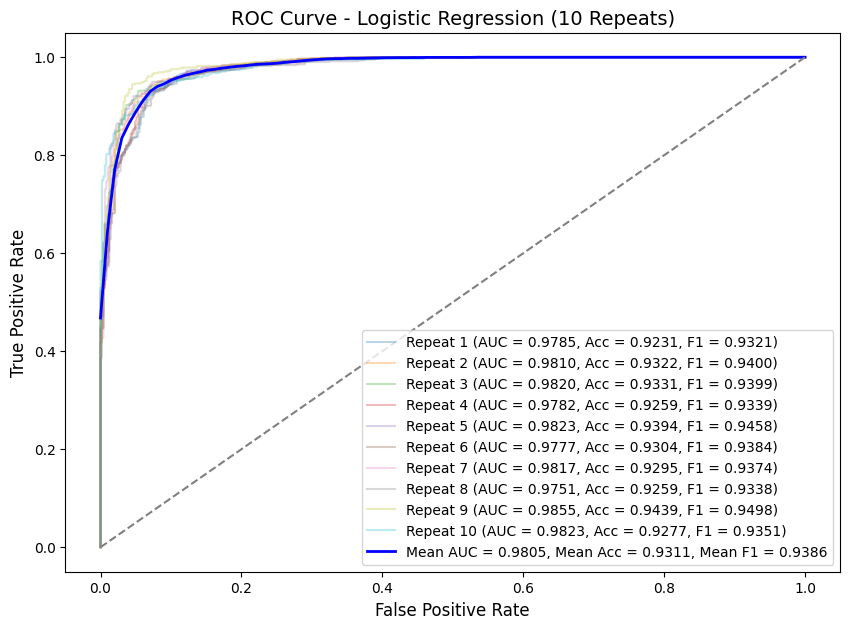


Results for Logistic Regression (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9231		0.9785	0.9321
2	0.9322		0.9810	0.9400
3	0.9331		0.9820	0.9399
4	0.9259		0.9782	0.9339
5	0.9394		0.9822	0.9458
6	0.9304		0.9777	0.9384
7	0.9295		0.9816	0.9374
8	0.9259		0.9751	0.9338
9	0.9439		0.9855	0.9498
10	0.9268		0.9824	0.9342


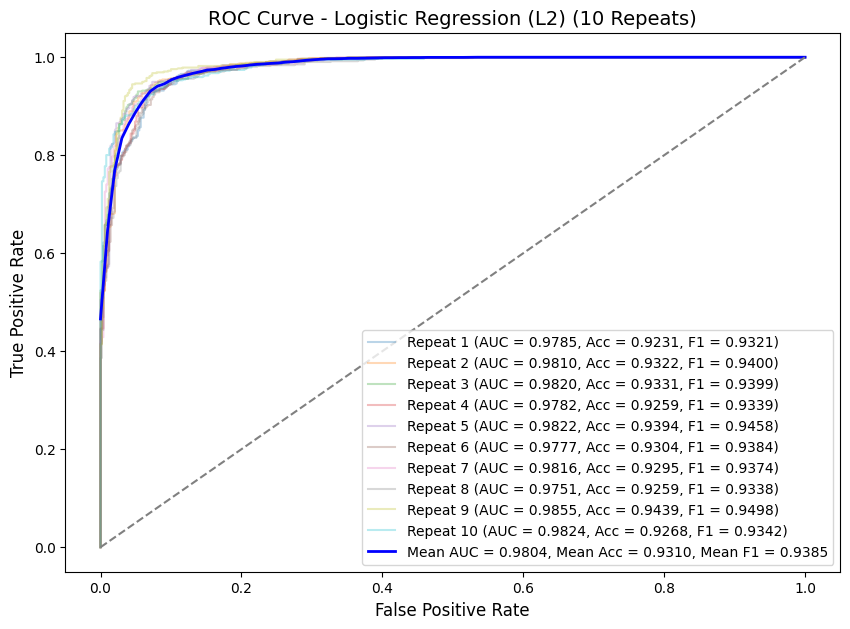


Results for Logistic Regression (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9231		0.9785	0.9321
2	0.9322		0.9811	0.9400
3	0.9331		0.9821	0.9399
4	0.9250		0.9783	0.9331
5	0.9394		0.9823	0.9458
6	0.9304		0.9777	0.9384
7	0.9295		0.9817	0.9374
8	0.9259		0.9752	0.9338
9	0.9439		0.9855	0.9498
10	0.9277		0.9823	0.9351


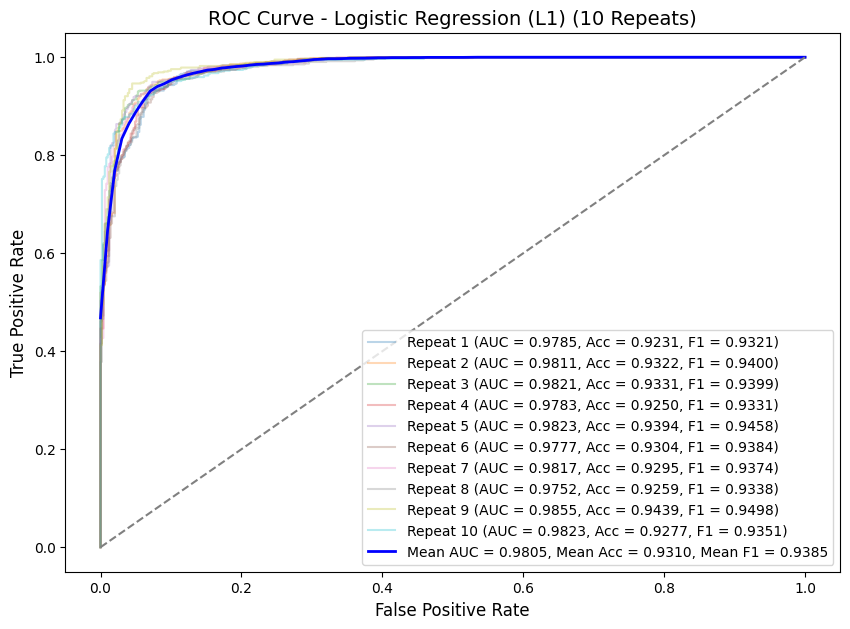


Results for 3-Layer NN:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9250		0.9795	0.9339
2	0.9349		0.9809	0.9423
3	0.9394		0.9814	0.9457
4	0.9259		0.9763	0.9334
5	0.9376		0.9819	0.9441
6	0.9286		0.9777	0.9367
7	0.9358		0.9805	0.9430
8	0.9231		0.9748	0.9314
9	0.9503		0.9856	0.9554
10	0.9331		0.9794	0.9399


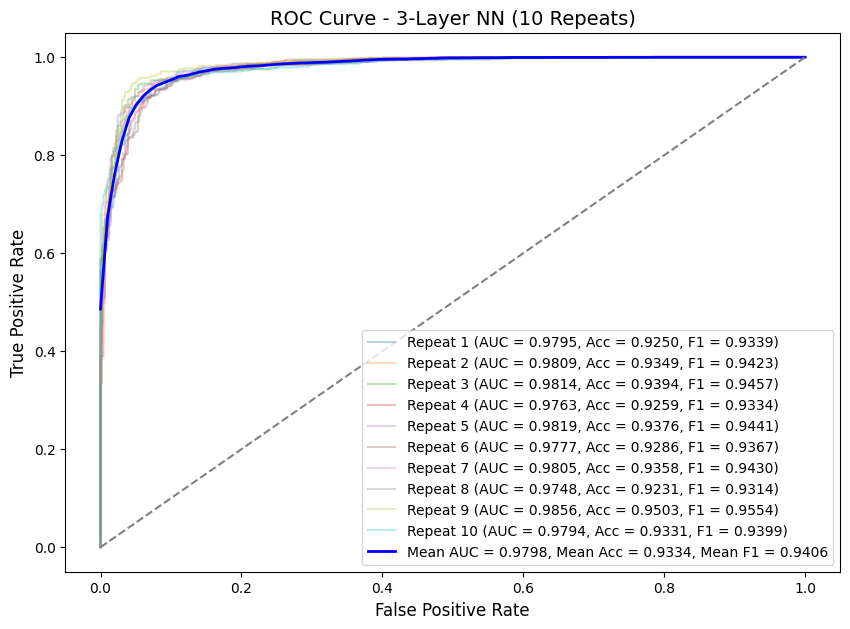


Results for 3-Layer NN (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9213		0.9749	0.9308
2	0.9304		0.9774	0.9383
3	0.9349		0.9777	0.9420
4	0.9268		0.9706	0.9350
5	0.9304		0.9795	0.9378
6	0.9250		0.9744	0.9337
7	0.9358		0.9767	0.9430
8	0.9195		0.9706	0.9282
9	0.9430		0.9810	0.9492
10	0.9286		0.9757	0.9362


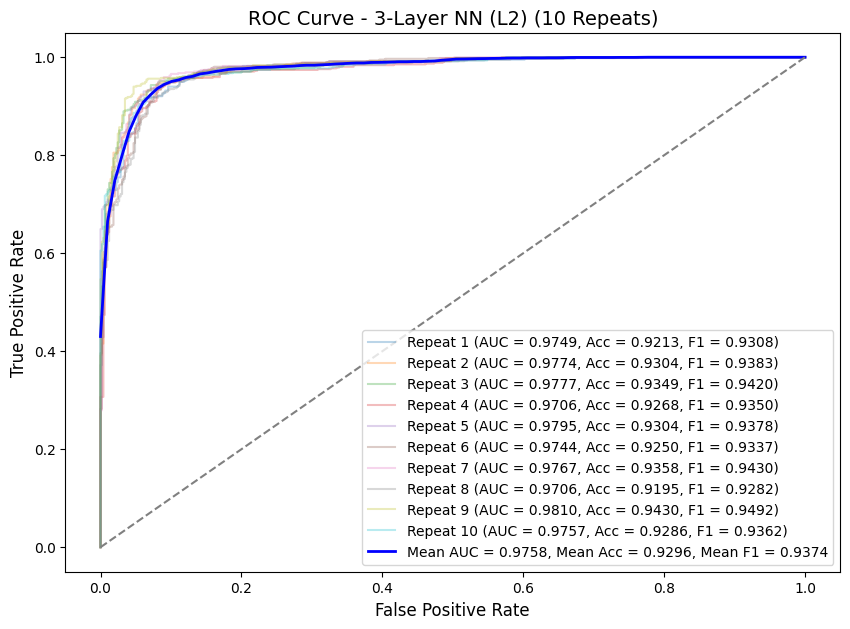


Results for 3-Layer NN (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.5570		0.8123	0.7154
2	0.5570		0.5908	0.7154
3	0.5570		0.1697	0.7154
4	0.5570		0.2870	0.7154
5	0.6944		0.9425	0.7844
6	0.5570		0.8513	0.7154
7	0.5570		0.9297	0.7154
8	0.5570		0.3456	0.7154
9	0.5570		0.7039	0.7154
10	0.4430		0.1614	0.0000


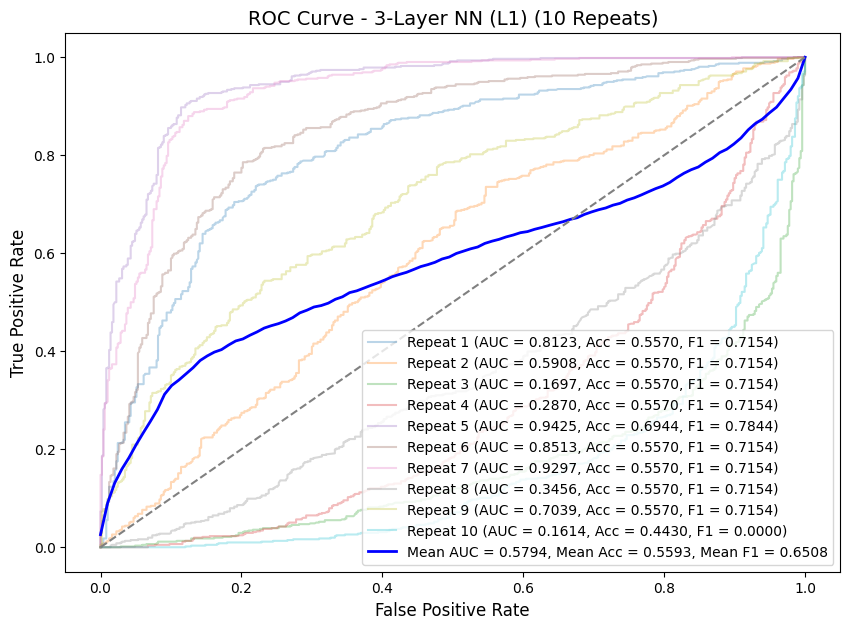

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score

# Define Neural Network
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, reg_type=None, reg_lambda=0.01):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for probability output
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Ensure output is between 0 and 1
        return x

# Function to train Neural Network and compute metrics
def train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=None, reg_lambda=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Ensure target labels are 0 and 1
    y_train = np.where(y_train == -1, 0, y_train)
    y_test = np.where(y_test == -1, 0, y_test)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model
    model = ThreeLayerNN(X_train.shape[1], reg_type, reg_lambda).to(device)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)

        # Compute loss
        loss = criterion(outputs, y_train_tensor)

        # Apply regularization if specified
        if reg_type == "L1":
            l1_loss = sum(p.abs().sum() for p in model.parameters())
            loss += reg_lambda * l1_loss
        elif reg_type == "L2":
            l2_loss = sum((p ** 2).sum() for p in model.parameters())
            loss += reg_lambda * l2_loss

        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_probs = model(X_test_tensor).cpu().numpy()
        preds = (y_probs > 0.5).astype(int)

        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = auc(fpr, tpr)

    return fpr, tpr, auc_score, acc, f1




# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "3-Layer NN": ("nn", None),
    "3-Layer NN (L2)": ("nn", "L2"),
    "3-Layer NN (L1)": ("nn", "L1")
}

# Training and evaluation loop
for model_name, model in models.items():
    plt.figure(figsize=(10, 7))
    mean_fpr = np.linspace(0, 1, 100)
    tprs, aucs, accs, f1s = [], [], [], []
    
    print(f"\nResults for {model_name}:")
    print("Repeat\tAccuracy\tAUC\t\tF-Measure")
    print("-" * 50)
    
    for repeat in range(10):
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=repeat)
        train_index, test_index = next(skf.split(X, y))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if isinstance(model, tuple) and model[0] == "nn":
            reg_type = model[1]
            fpr, tpr, auc_score, acc, f1 = train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=reg_type)
        else:
            model.fit(X_train, y_train)
            y_probs = model.predict_proba(X_test)[:, 1]
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            f1 = f1_score(y_test, preds)
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            auc_score = roc_auc_score(y_test, y_probs)
        
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc_score)
        accs.append(acc)
        f1s.append(f1)
        
        print(f"{repeat+1}\t{acc:.4f}\t\t{auc_score:.4f}\t{f1:.4f}")
        plt.plot(fpr, tpr, alpha=0.3, label=f"Repeat {repeat+1} (AUC = {auc_score:.4f}, Acc = {acc:.4f}, F1 = {f1:.4f})")
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)
    
    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f"Mean AUC = {mean_auc:.4f}, Mean Acc = {mean_acc:.4f}, Mean F1 = {mean_f1:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    
    plt.title(f"ROC Curve - {model_name} (10 Repeats)", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.show()


In [7]:
import numpy as np
from scipy.stats import ttest_rel
import itertools
import pandas as pd

# Define accuracy results for each model
logreg = [0.9231, 0.9322, 0.9331, 0.9259, 0.9394, 0.9304, 0.9295, 0.9259, 0.9439, 0.9277]
logreg_l2 = [0.9231, 0.9322, 0.9331, 0.9259, 0.9394, 0.9304, 0.9295, 0.9259, 0.9439, 0.9268]
logreg_l1 = [0.9231, 0.9322, 0.9331, 0.9250, 0.9394, 0.9304, 0.9295, 0.9259, 0.9439, 0.9277]
nn = [0.9250, 0.9349, 0.9394, 0.9259, 0.9376, 0.9286, 0.9358, 0.9231, 0.9503, 0.9331]
nn_l2 = [0.9213, 0.9304, 0.9349, 0.9268, 0.9304, 0.9250, 0.9358, 0.9195, 0.9430, 0.9286]
nn_l1 = [0.5570, 0.5570, 0.5570, 0.5570, 0.6944, 0.5570, 0.5570, 0.5570, 0.5570, 0.4430]

# Store model names and accuracy lists
model_names = [
    "Logistic Regression", 
    "Logistic Regression (L2)", 
    "Logistic Regression (L1)", 
    "3-Layer NN", 
    "3-Layer NN (L2)", 
    "3-Layer NN (L1)"
]
model_accuracies = [logreg, logreg_l2, logreg_l1, nn, nn_l2, nn_l1]

# Perform paired t-tests and store results
alpha = 0.05  # Significance level
results = []

for (i, j) in itertools.combinations(range(len(model_names)), 2):
    stat, p = ttest_rel(model_accuracies[i], model_accuracies[j])
    significant = "Yes" if p < alpha else "No"
    results.append([model_names[i], model_names[j], stat, p, significant])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "t-statistic", "p-value", "Significant Difference?"])

# Print results
print(results_df.to_string(index=False))

                 Model 1                  Model 2   t-statistic      p-value Significant Difference?
     Logistic Regression Logistic Regression (L2)  1.000000e+00 3.434364e-01                      No
     Logistic Regression Logistic Regression (L1)  1.000000e+00 3.434364e-01                      No
     Logistic Regression               3-Layer NN -1.928160e+00 8.592552e-02                      No
     Logistic Regression          3-Layer NN (L2)  1.091238e+00 3.035187e-01                      No
     Logistic Regression          3-Layer NN (L1)  2.066273e+01 6.809486e-09                     Yes
Logistic Regression (L2) Logistic Regression (L1) -8.275114e-14 1.000000e+00                      No
Logistic Regression (L2)               3-Layer NN -1.955130e+00 8.228583e-02                      No
Logistic Regression (L2)          3-Layer NN (L2)  1.013095e+00 3.374749e-01                      No
Logistic Regression (L2)          3-Layer NN (L1)  2.072991e+01 6.617048e-09               

**Logistic Regression and its variations are statistically similar in accuracy.
3-Layer NN (L1) performs significantly worse than all other models.
3-Layer NN (L2) shows some performance difference compared to the standard version but not as extreme as L1 regularization.
3-Layer NN (L1) is clearly underperforming and is not a good choice for this problem.**